# **🍽️ Restaurant Tips Analysis**

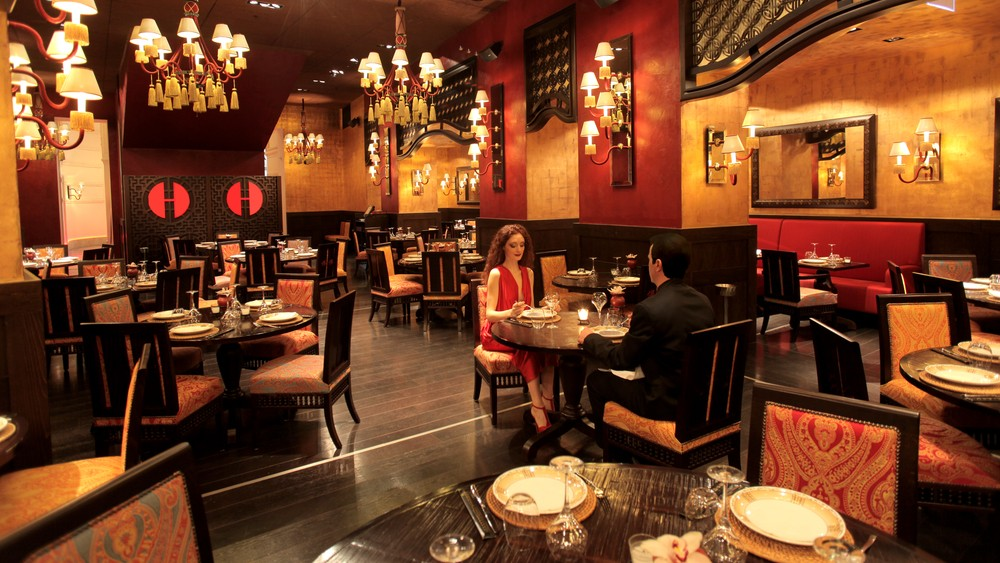

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [4]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt


Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [5]:
# PUT YOUR CODE HERE
data = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')


### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [6]:
# PUT YOUR CODE HERE
data.head(5)


,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [7]:
# PUT YOUR CODE HERE
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

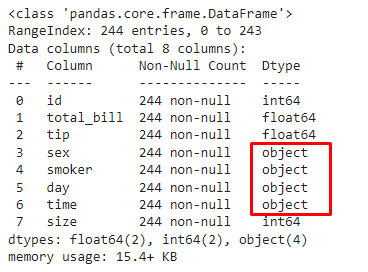

Let's fix their types and make them string:

In [8]:
# PUT YOUR CODE HERE
data[["sex", "smoker", "day", "time"]] = data[["sex", "smoker", "day", "time"]].astype('string')

Check again (output columns and their types):

In [9]:
# PUT YOUR CODE HERE
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), string(4)
memory usage: 15.4 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [10]:
# PUT YOUR CODE HERE
data.describe()

,id,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [11]:
# PUT YOUR CODE HERE
smokers_df = pd.DataFrame( data = data[data.smoker == 'Yes'])


Check whether everything is okay. Output a test sample (5 random rows):

In [12]:
# PUT YOUR CODE HERE
smokers_df.sample(5)


,id,total_bill,tip,sex,smoker,day,time,size
200,200,18.71,4.00,Male,Yes,Thur,Lunch,3
58,58,11.24,1.76,Male,Yes,Sat,Dinner,2
102,102,44.30,2.50,Female,Yes,Sat,Dinner,3
199,199,13.51,2.00,Male,Yes,Thur,Lunch,2
172,172,7.25,5.15,Male,Yes,Sun,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [13]:
# PUT YOUR CODE HERE
non_smokers_df = pd.DataFrame(data = data[data.smoker == 'No'])


Check whether everything is okay. Output a test sample (5 random rows):

In [14]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)


,id,total_bill,tip,sex,smoker,day,time,size
144,144,16.43,2.30,Female,No,Thur,Lunch,2
166,166,20.76,2.24,Male,No,Sun,Dinner,2
8,8,15.04,1.96,Male,No,Sun,Dinner,2
114,114,25.71,4.00,Female,No,Sun,Dinner,3
1,1,10.34,1.66,Male,No,Sun,Dinner,3


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [15]:
# YOUR CODE
common_tip_min = data.tip.min()
common_tip_max = data.tip.max()
common_tip_mean = data.tip.mean()
common_tip_median = data.tip.median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [16]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [17]:
# YOUR CODE
smokers_tip_min = smokers_df.tip.min()
smokers_tip_max = smokers_df.tip.max()
smokers_tip_mean = smokers_df.tip.mean()
smokers_tip_median = smokers_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [18]:
# YOUR CODE
# Make a list of values
smokers_df_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_df_values = map(lambda x: round(x, 4), smokers_df_values)

# Make a dataframe from the list
smokers_df_mct = pd.DataFrame(smokers_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_df_mct


,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [19]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df.tip.min()
non_smokers_tip_max = non_smokers_df.tip.max()
non_smokers_tip_mean = non_smokers_df.tip.mean()
non_smokers_tip_median = non_smokers_df.tip.median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [20]:
# YOUR CODE
# Make a list of values
non_smokers_df_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_df_values = map(lambda x: round(x, 4), non_smokers_df_values)

# Make a dataframe from the list
non_smokers_df_mct = pd.DataFrame(non_smokers_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_df_mct


,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [21]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1
2. Insight 1

**General conclusion:**


#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

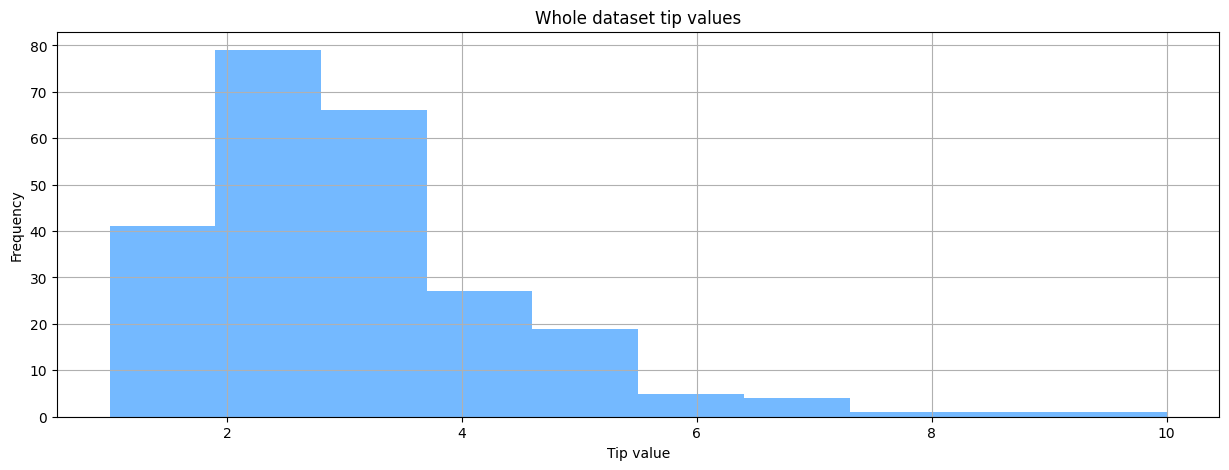

In [22]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(data.tip, color = '#74b9ff')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)

plt.show()



##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

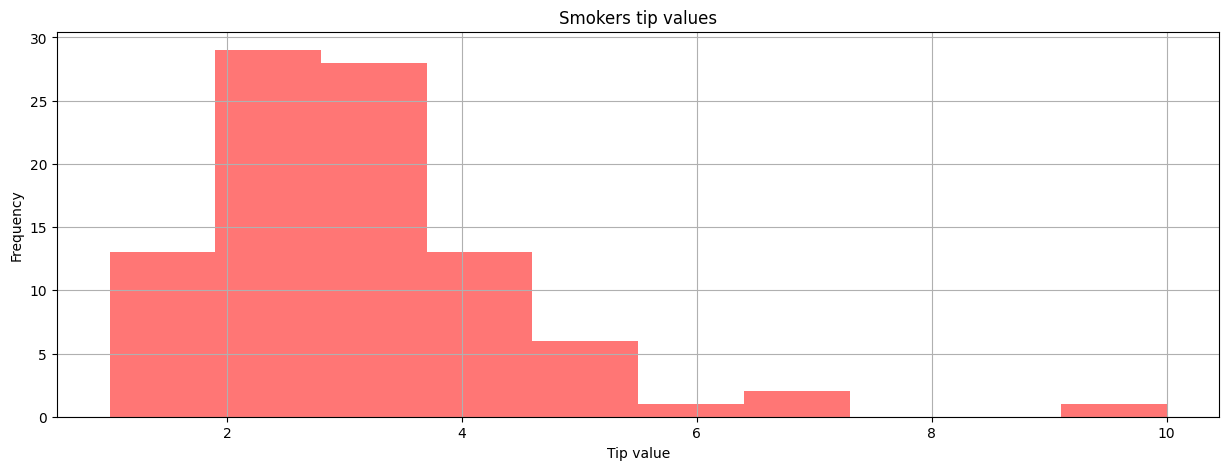

In [23]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(smokers_df.tip, color = '#ff7675')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')

plt.grid(True)

plt.show()



##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

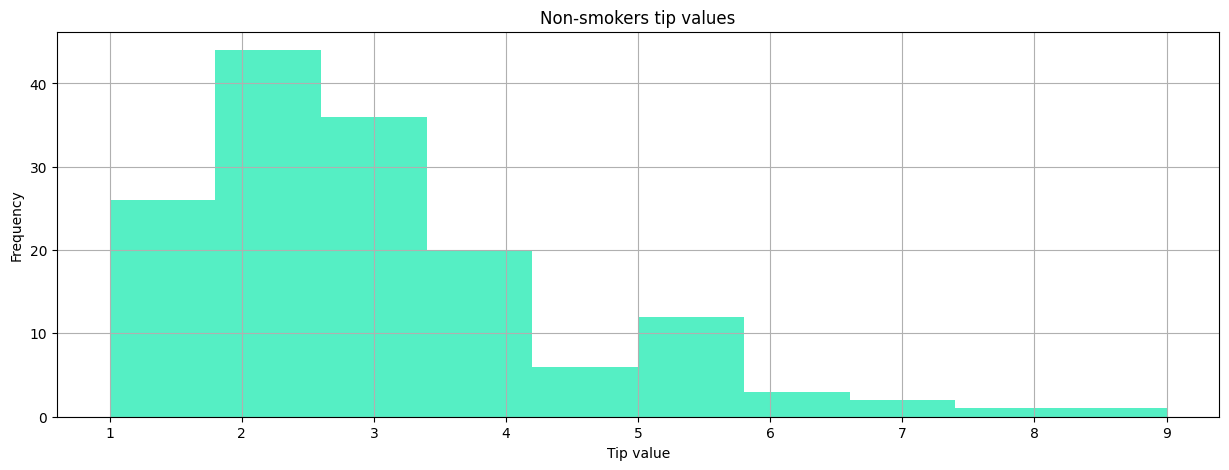

In [24]:
# YOUR CODE
plt.figure(figsize=(15, 5))

plt.hist(non_smokers_df.tip, color = '#55efc4')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')

plt.grid(True)

plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

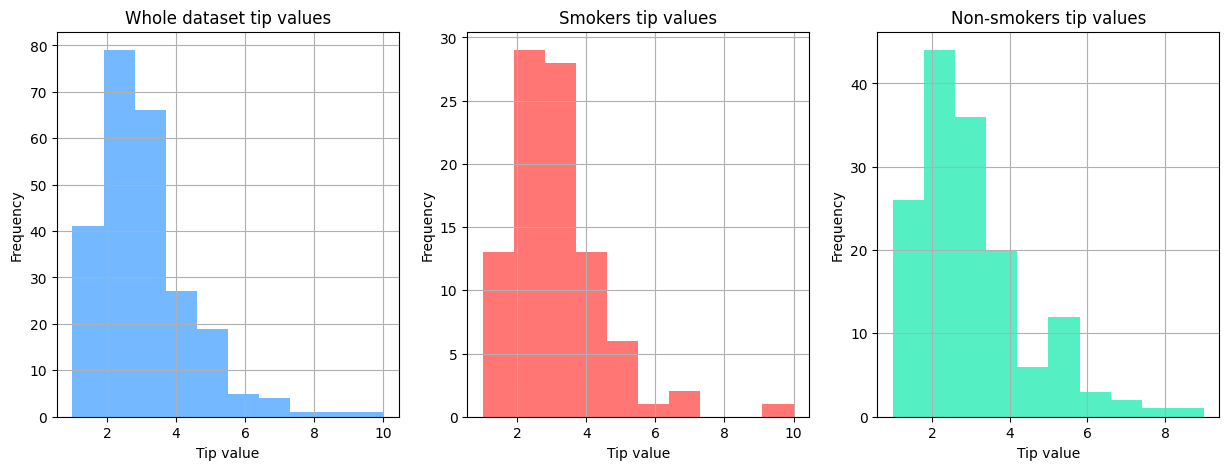

In [25]:
# YOUR CODE
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

#Whole data
axis[0].hist(data.tip, color = '#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)

#Smokers
axis[1].hist(smokers_df.tip, color = '#ff7675')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Smokers tip values')
axis[1].grid(True)

#Non_smokers
axis[2].hist(non_smokers_df.tip, color = '#55efc4')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Non-smokers tip values')
axis[2].grid(True)



##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1

**General conclusion:**
Based on measures of central tendency comparison and distribution comparison, we do not have enough evidence to confirm that smokers tip more.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

Let's figure out the difference between male and female in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate male and female**

Create a new dataframe `male_df` containing only info about male.

In [26]:
male_df = pd.DataFrame(data = data[data.sex == 'Male'])

Check whether everything is okay. Output a test sample (5 random rows):

In [56]:
male_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
54,54,25.56,4.34,Male,No,Sun,Dinner,4
53,53,9.94,1.56,Male,No,Sun,Dinner,2
173,173,31.85,3.18,Male,Yes,Sun,Dinner,2
196,196,10.34,2.00,Male,Yes,Thur,Lunch,2
222,222,8.58,1.92,Male,Yes,Fri,Lunch,1


Also create another one dataframe `female_df` containing only female.

In [28]:
female_df = pd.DataFrame(data = data[data.sex == 'Female'])

Check whether everything is okay. Output a test sample (5 random rows):

In [57]:
female_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
67,67,3.07,1.00,Female,Yes,Sat,Dinner,1
229,229,22.12,2.88,Female,Yes,Sat,Dinner,2
225,225,16.27,2.50,Female,Yes,Fri,Lunch,2
162,162,16.21,2.00,Female,No,Sun,Dinner,3
71,71,17.07,3.00,Female,No,Sat,Dinner,3


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **👨 Male**

Calculate measures of central tendency for male and save them into the following variables:

- min => male_df_tip_min
- max => male_df_tip_max
- mean => male_df_tip_mean
- median => male_df_tip_median

In [30]:
male_df_tip_min = male_df.tip.min()
male_df_tip_max = male_df.tip.max()
male_df_tip_mean = male_df.tip.mean()
male_df_tip_median = male_df.tip.median()


Let's show the resulting values for male:

In [31]:
# Make a list of values
male_df_values = [male_df_tip_min, male_df_tip_max, male_df_tip_mean, male_df_tip_median]
# Round all the values to 4 decimal places
male_df_values = map(lambda x: round(x, 4), male_df_values)

# Make a dataframe from the list
male_df_mct = pd.DataFrame(male_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
male_df_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


##### **👩 Female**

Calculate measures of central tendency for female and save them into the following variables:

- min => female_df_tip_min
- max => female_df_tip_max
- mean => female_df_tip_mean
- median => female_df_tip_median

In [32]:
female_df_tip_min = female_df.tip.min()
female_df_tip_max = female_df.tip.max()
female_df_tip_mean = female_df.tip.mean()
female_df_tip_median = female_df.tip.median()

Let's show the resulting values for female:

In [33]:
# Make a list of values
female_df_values = [female_df_tip_min, female_df_tip_max, female_df_tip_mean, female_df_tip_median]
# Round all the values to 4 decimal places
female_df_values = map(lambda x: round(x, 4), female_df_values)

# Make a dataframe from the list
female_df_mct = pd.DataFrame(female_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
female_df_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


##### **📝 Conclusion**

Let's show the retrieved results together

In [34]:
all_vals_dict_1 = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Male': {'min': male_df_tip_min, 'max': male_df_tip_max, 'mean': male_df_tip_mean, 'median': male_df_tip_median},
    'Female': {'min': female_df_tip_min, 'max': female_df_tip_max, 'mean': female_df_tip_mean, 'median': female_df_tip_median}
}

# Make a dataframe
all_mct_1 = pd.DataFrame(all_vals_dict_1)
# Output the dataframe
all_mct_1

,Common,Male,Female
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


#### **Look at histograms**

There are a lot of cases, when comparing the measures of central tendency is not enough. This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

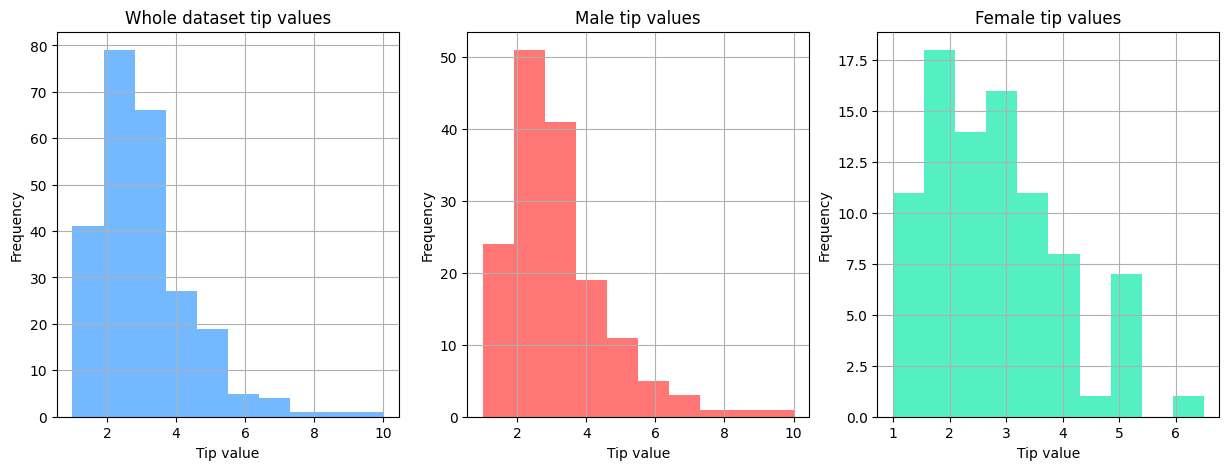

In [35]:
# YOUR CODE
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

#Whole data
axis[0].hist(data.tip, color = '#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)

#Male
axis[1].hist(male_df.tip, color = '#ff7675')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Male tip values')
axis[1].grid(True)

#Female
axis[2].hist(female_df.tip, color = '#55efc4')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Female tip values')
axis[2].grid(True)

**General conclusion:**
Based on measures of central tendency comparison and distribution comparison, we can confirm that male tip is more than female.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

#### **Separate weekday and weekend**

Create a new dataframe `weekday_df` containing only info about weekday.

In [36]:
weekday_df = pd.DataFrame(data = data[(data.day != 'Sat') & (data.day != 'Sun')])

Check whether everything is okay. Output a test sample (5 random rows):

In [58]:
weekday_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
93,93,16.32,4.30,Female,Yes,Fri,Dinner,2
222,222,8.58,1.92,Male,Yes,Fri,Lunch,1
96,96,27.28,4.00,Male,Yes,Fri,Dinner,2
149,149,7.51,2.00,Male,No,Thur,Lunch,2
196,196,10.34,2.00,Male,Yes,Thur,Lunch,2


Also create another one dataframe `weekend_df` containing only weekend.

In [38]:
weekend_df = pd.DataFrame(data = data[(data.day == 'Sat') | (data.day == 'Sun')])

Check whether everything is okay. Output a test sample (5 random rows):

In [59]:
weekend_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
60,60,20.29,3.21,Male,Yes,Sat,Dinner,2
218,218,7.74,1.44,Male,Yes,Sat,Dinner,2
37,37,16.93,3.07,Female,No,Sat,Dinner,3
176,176,17.89,2.00,Male,Yes,Sun,Dinner,2
155,155,29.85,5.14,Female,No,Sun,Dinner,5


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **📆 Weekday**

Calculate measures of central tendency for male and save them into the following variables:

- min => weekday_df_tip_min
- max => weekday_df_tip_max
- mean => weekday_df_tip_mean
- median => weekday_df_tip_median

In [40]:
weekday_df_tip_min = weekday_df.tip.min()
weekday_df_tip_max = weekday_df.tip.max()
weekday_df_tip_mean = weekday_df.tip.mean()
weekday_df_tip_median = weekday_df.tip.median()

Let's show the resulting values for weekday:

In [41]:
# Make a list of values
weekday_df_values = [weekday_df_tip_min, weekday_df_tip_max, weekday_df_tip_mean, weekday_df_tip_median]
# Round all the values to 4 decimal places
weekday_df_values = map(lambda x: round(x, 4), weekday_df_values)

# Make a dataframe from the list
weekday_df_mct = pd.DataFrame(weekday_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekday_df_mct

,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


##### **📆 Weekend**

Calculate measures of central tendency for weekend and save them into the following variables:

- min => weekend_df_tip_min
- max => weekend_df_tip_max
- mean => weekend_df_tip_mean
- median => weekend_df_tip_median

In [42]:
weekend_df_tip_min = weekend_df.tip.min()
weekend_df_tip_max = weekend_df.tip.max()
weekend_df_tip_mean = weekend_df.tip.mean()
weekend_df_tip_median = weekend_df.tip.median()

Let's show the resulting values for weekend:

In [43]:
# Make a list of values
weekend_df_values = [weekend_df_tip_min, weekend_df_tip_max, weekend_df_tip_mean, weekend_df_tip_median]
# Round all the values to 4 decimal places
weekend_df_values = map(lambda x: round(x, 4), weekend_df_values)

# Make a dataframe from the list
weekend_df_mct = pd.DataFrame(weekend_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekend_df_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


##### **📝 Conclusion**

Let's show the retrieved results together

In [44]:
all_vals_dict_2 = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Weekday': {'min': weekday_df_tip_min, 'max': weekday_df_tip_max, 'mean': weekday_df_tip_mean, 'median': weekday_df_tip_median},
    'Weekend': {'min': weekend_df_tip_min, 'max': weekend_df_tip_max, 'mean': weekend_df_tip_mean, 'median': weekend_df_tip_median}
}

# Make a dataframe
all_mct_2 = pd.DataFrame(all_vals_dict_2)
# Output the dataframe
all_mct_2

,Common,Weekday,Weekend
min,1.000000,1.00000,1.000000
max,10.000000,6.70000,10.000000
mean,2.998279,2.76284,3.115276
median,2.900000,2.50000,3.000000


#### **Look at histograms**

There are a lot of cases, when comparing the measures of central tendency is not enough. This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

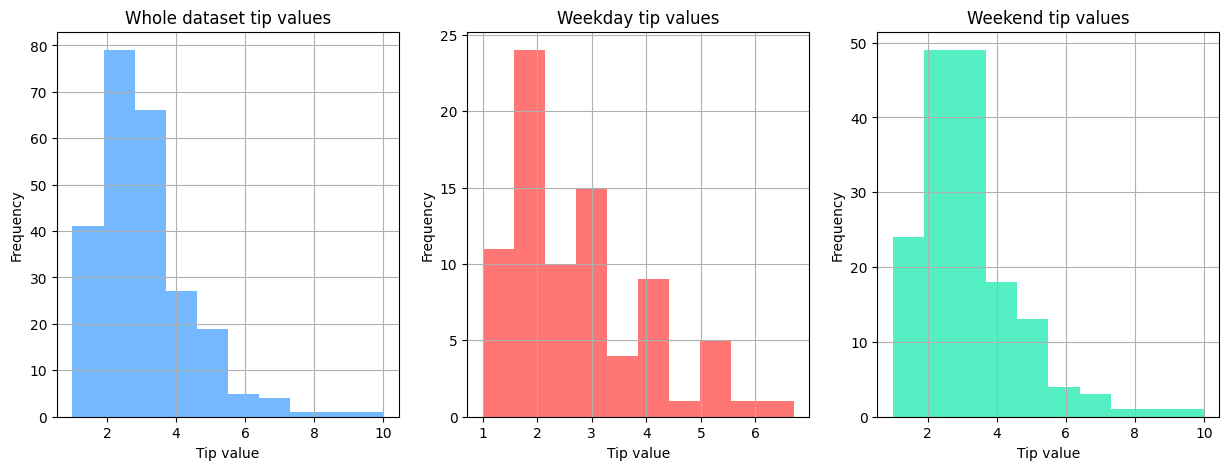

In [45]:
# YOUR CODE
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

#Whole data
axis[0].hist(data.tip, color = '#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)

#Weekday
axis[1].hist(weekday_df.tip, color = '#ff7675')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Weekday tip values')
axis[1].grid(True)

#Weekend
axis[2].hist(weekend_df.tip, color = '#55efc4')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Weekend tip values')
axis[2].grid(True)

**General conclusion:** Based on measures of central tendency comparison and distribution comparison, we can confirm that weekend tip is larger than weekday.

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

Let's figure out the difference between lunch and dinner.

#### **Separate lunch and dinner**

Create a new dataframe `lunch_df` containing only info about lunch.

In [46]:
lunch_df = data[data.time == 'Lunch']

Check whether everything is okay. Output a test sample (5 random rows):

In [60]:
lunch_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
85,85,34.83,5.17,Female,No,Thur,Lunch,4
78,78,22.76,3.00,Male,No,Thur,Lunch,2
125,125,29.80,4.20,Female,No,Thur,Lunch,6
82,82,10.07,1.83,Female,No,Thur,Lunch,1
137,137,14.15,2.00,Female,No,Thur,Lunch,2


Also create another one dataframe `dinner_df` containing only dinner.

In [48]:
dinner_df = data[data.time == 'Dinner']

Check whether everything is okay. Output a test sample (5 random rows):

In [61]:
dinner_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
98,98,21.01,3.00,Male,Yes,Fri,Dinner,2
93,93,16.32,4.30,Female,Yes,Fri,Dinner,2
172,172,7.25,5.15,Male,Yes,Sun,Dinner,2
17,17,16.29,3.71,Male,No,Sun,Dinner,3
151,151,13.13,2.00,Male,No,Sun,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🕑 Lunch**

Calculate measures of central tendency for lunch and save them into the following variables:

- min => lunch_df_tip_min
- max => lunch_df_tip_max
- mean => lunch_df_tip_mean
- median => lunch_df_tip_median

In [50]:
lunch_df_tip_min = lunch_df.tip.min()
lunch_df_tip_max = lunch_df.tip.max()
lunch_df_tip_mean = lunch_df.tip.mean()
lunch_df_tip_median = lunch_df.tip.median()


Let's show the resulting values for lunch:

In [51]:
# Make a list of values
lunch_df_values = [lunch_df_tip_min, lunch_df_tip_max, lunch_df_tip_mean, lunch_df_tip_median]
# Round all the values to 4 decimal places
lunch_df_values = map(lambda x: round(x, 4), lunch_df_values)

# Make a dataframe from the list
lunch_df_mct = pd.DataFrame(lunch_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
lunch_df_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


##### **🕑 Dinner**

Calculate measures of central tendency for weekend and save them into the following variables:

- min => dinner_df_tip_min
- max => dinner_df_tip_max
- mean => dinner_df_tip_mean
- median => dinner_df_tip_median

In [52]:
dinner_df_tip_min = dinner_df.tip.min()
dinner_df_tip_max = dinner_df.tip.max()
dinner_df_tip_mean = dinner_df.tip.mean()
dinner_df_tip_median = dinner_df.tip.median()

Let's show the resulting values for dinner:

In [53]:
# Make a list of values
dinner_df_values = [dinner_df_tip_min, dinner_df_tip_max, dinner_df_tip_mean, dinner_df_tip_median]
# Round all the values to 4 decimal places
dinner_df_values = map(lambda x: round(x, 4), dinner_df_values)

# Make a dataframe from the list
dinner_df_mct = pd.DataFrame(dinner_df_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
dinner_df_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


##### **📝 Conclusion**

Let's show the retrieved results together

In [54]:
all_vals_dict_3 = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Lunch': {'min': lunch_df_tip_min, 'max': lunch_df_tip_max, 'mean': lunch_df_tip_mean, 'median': lunch_df_tip_median},
    'Dinner': {'min': dinner_df_tip_min, 'max': dinner_df_tip_max, 'mean': dinner_df_tip_mean, 'median': dinner_df_tip_median}
}

# Make a dataframe
all_mct_3 = pd.DataFrame(all_vals_dict_3)
# Output the dataframe
all_mct_3

,Common,Lunch,Dinner
min,1.000000,1.250000,1.00000
max,10.000000,6.700000,10.00000
mean,2.998279,2.728088,3.10267
median,2.900000,2.250000,3.00000


#### **Look at histograms**

There are a lot of cases, when comparing the measures of central tendency is not enough. This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

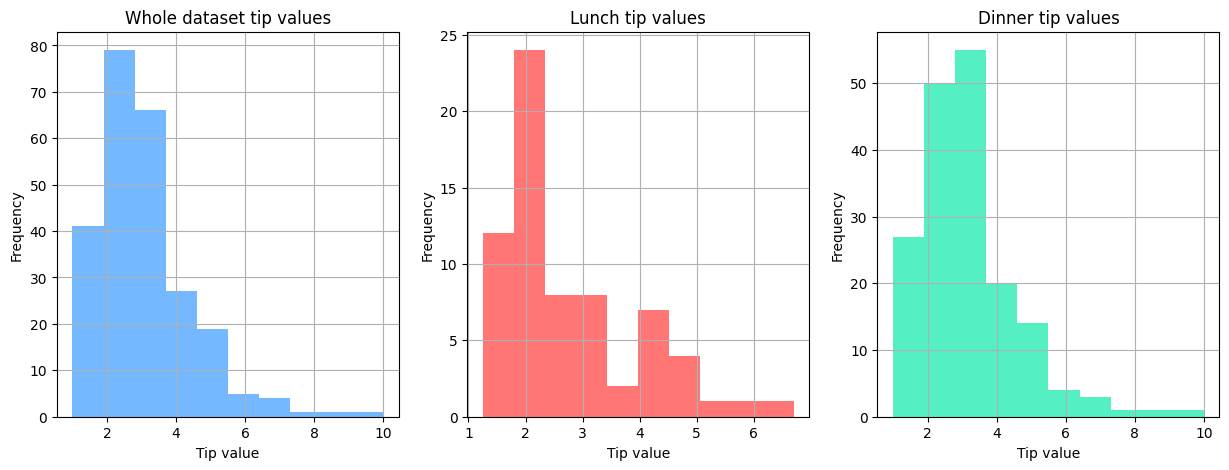

In [55]:
# YOUR CODE
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

#Whole data
axis[0].hist(data.tip, color = '#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)

#Lunch
axis[1].hist(lunch_df.tip, color = '#ff7675')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Lunch tip values')
axis[1].grid(True)

#Dinner
axis[2].hist(dinner_df.tip, color = '#55efc4')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Dinner tip values')
axis[2].grid(True)

**General conclusion:** Based on measures of central tendency comparison and distribution comparison, we can confirm that dinner time tips more than lunch time.